In [167]:
# Import Base Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import DataSets
from sklearn import datasets
from sklearn.metrics import accuracy_score

# Import Torch Libraries
import torch 
import torch.nn as NN
import torch.nn.functional as F

In [173]:
# Load Iris Dataset
iris_df = datasets.load_iris()

# Create Features and Targets
X = iris_df.data
y = iris_df.target

# Split Data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [178]:
# Convert Features to Float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert Labels to Long Tensors becuase they are just integers.
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


class ANN_Model(NN.Module):
    # Input
    def __init__(self, in_features=4, h1=8, h2=32, out_features=3):
        super().__init__()
        self.fc1 = NN.Linear(in_features, h1)
        self.fc2 = NN.Linear(h1, h2)
        self.out = NN.Linear(h2, out_features)
        # self.softmax = NN.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        # x = self.softmax(x)

        return x
    
torch.manual_seed(0)

ann_model = ANN_Model()

# Set Criterion and Optimizer
criterion = NN.CrossEntropyLoss()
optimizer = torch.optim.Adam(ann_model.parameters(), lr=0.01)

# To show Model Parameters
ann_model.parameters

<bound method Module.parameters of ANN_Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=3, bias=True)
)>

In [179]:
# Train the Model
EPOCHS = 500

# Metric Arrays

losses = []
accuracy = []


def model_accuracy(y_pred, y):

    correct = 0

    for i in range(0, len(y)):
        if y_pred[i].argmax().item() == y[i]:
            correct += 1
    
    return correct/len(y)


print('\t\tANN Model Training')
print('-'*50)

for i in range(EPOCHS):

    # Go forward and get a predition
    y_pred = ann_model.forward(X_train)

    train_accuracy = model_accuracy(y_pred, y_train)
    val_accuracy = model_accuracy(ann_model.forward(X_test), y_test)

    accuracy.append(train_accuracy)

    # Calculate Loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%100 == 0:
        print(f'Epoch: {i} \t Loss: {loss.item()} \t Train_Accuracy: {train_accuracy} \t Test_Accuracy: {val_accuracy}')
    
    # Zero Gradients
    optimizer.zero_grad()

    # Calculate Gradients
    loss.backward()
    
    # Update Weights
    optimizer.step()

		ANN Model Training
--------------------------------------------------
Epoch: 0 	 Loss: 1.1436963081359863 	 Train_Accuracy: 0.37142857142857144 	 Test_Accuracy: 0.24444444444444444
Epoch: 100 	 Loss: 0.0330037884414196 	 Train_Accuracy: 0.9904761904761905 	 Test_Accuracy: 0.9777777777777777
Epoch: 200 	 Loss: 0.02339733950793743 	 Train_Accuracy: 0.9809523809523809 	 Test_Accuracy: 0.9777777777777777
Epoch: 300 	 Loss: 0.019138816744089127 	 Train_Accuracy: 1.0 	 Test_Accuracy: 0.9777777777777777
Epoch: 400 	 Loss: 0.016649145632982254 	 Train_Accuracy: 1.0 	 Test_Accuracy: 0.9777777777777777


Text(0.5, 0, 'Epoch')

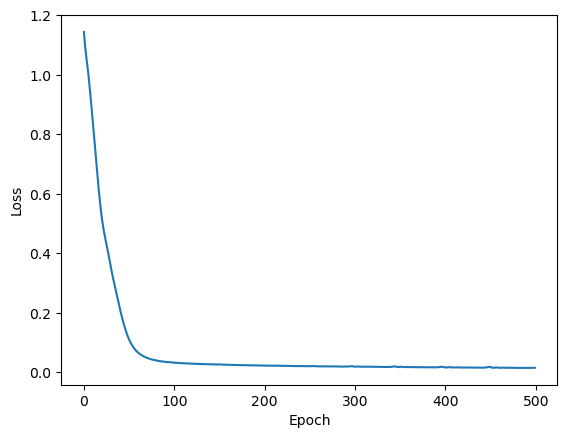

In [180]:
plt.plot(range(EPOCHS),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [182]:
with torch.no_grad():
    y_val = ann_model.forward(X_test).softmax(dim=1)

print(y_val)


tensor([[1.7820e-15, 1.6867e-12, 1.0000e+00],
        [1.5931e-06, 1.0000e+00, 6.8724e-15],
        [1.0000e+00, 4.4825e-08, 1.5414e-44],
        [2.7143e-15, 5.3678e-12, 1.0000e+00],
        [1.0000e+00, 2.2047e-06, 4.3178e-38],
        [1.4068e-19, 1.4218e-16, 1.0000e+00],
        [1.0000e+00, 1.2956e-06, 5.5698e-39],
        [7.0429e-07, 1.0000e+00, 3.2780e-11],
        [1.3910e-06, 1.0000e+00, 1.3674e-09],
        [6.0535e-07, 1.0000e+00, 1.8938e-16],
        [2.0239e-12, 1.8037e-09, 1.0000e+00],
        [5.9838e-07, 1.0000e+00, 1.9096e-12],
        [5.1694e-06, 9.9999e-01, 7.9492e-08],
        [1.9027e-06, 1.0000e+00, 4.3326e-09],
        [6.6634e-06, 9.9999e-01, 2.2486e-06],
        [1.0000e+00, 3.8959e-07, 7.6796e-40],
        [4.6845e-06, 1.0000e+00, 2.1674e-07],
        [1.7238e-05, 9.9998e-01, 3.4785e-06],
        [9.9999e-01, 1.3990e-05, 3.1257e-35],
        [1.0000e+00, 4.0963e-07, 6.9785e-42],
        [6.8533e-12, 9.6944e-09, 1.0000e+00],
        [1.3618e-05, 9.9994e-01, 4